In [1]:
#1. a) DFT function
import numpy as np

def DFT(signal):
    N = len(signal)
    x = [0.0]*len(signal)
    out = [0.0]*len(signal)
    k = 0
    while k < N:
        n = 0
        while n < N:
            x[n] = signal[n]*np.exp(-2j*np.pi*k/N*n)
            n+=1
        #
        out[k] = np.sum(x)
        k+=1
    return out
#b)IDFT function
def IDFT(signal):
    N = len(signal)
    x = [0.0]*len(signal)
    out = [0.0]*len(signal)
    n = 0
    while n < N:
        k = 0
        while k < N:
            x[k] = signal[k]*np.exp(2j*np.pi*k/N*n)
            k+=1
        #
        out[n] =1/N* np.sum(x)
        n+=1
    return out
    

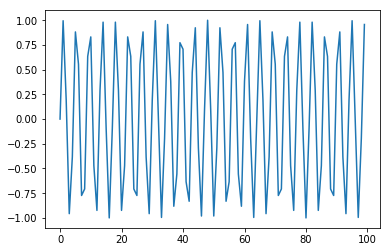

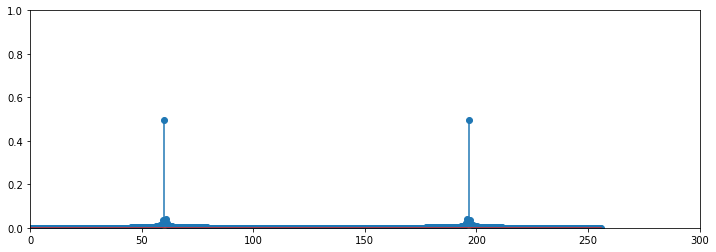

In [54]:
#c generate wave
from scipy import signal
import matplotlib.pyplot as plt
A=1
f=60.0
T=1/f
fs=256
Ts=1/fs
cycles=100
t=np.arange(0,cycles*T,Ts)
i=0
x=[0.]*len(t)
while i < len(t):
    x[i]=A*np.sin(2*np.pi*f*t[i])
    i+=1
plt.plot(x[:100])
plt.show()
plt.figure(figsize=(12,4))
Y = DFT(x[:1000])
N = len(x[:1000])
f = np.linspace(0, fs, N) 
plt.axis([0,300,0,1])
plt.stem(f,np.abs(Y)/N)
plt.show()


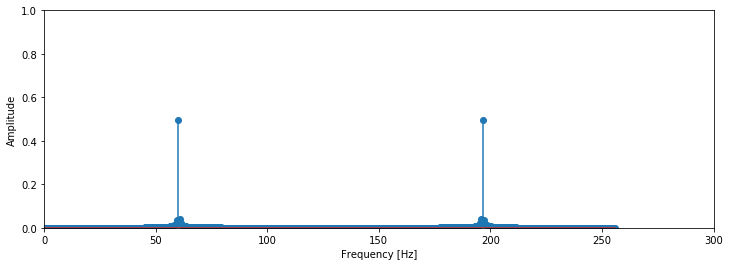

In [3]:
#d) testing DFT function
fft = np.fft.fft(x[:1000]) #xsamp is your stem plot data
N = len(x[:1000])
f = np.linspace(0, fs, N) 
plt.figure(figsize=(12,4))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.axis([0,300,0,1])
plt.stem(f,np.abs(fft)/N)
plt.show()
#looks simular with to the graph I got 

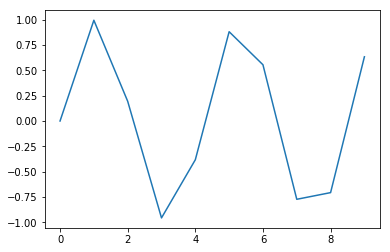

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


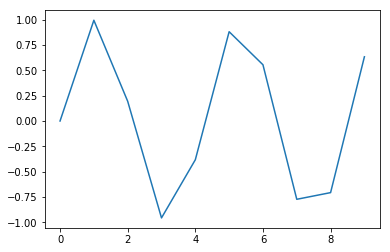

In [4]:
#tedting IDFT
plt.plot(x[:10])
plt.show()
x1 = IDFT(Y)
plt.plot(x1[:10])
plt.show()
#the seems to be same

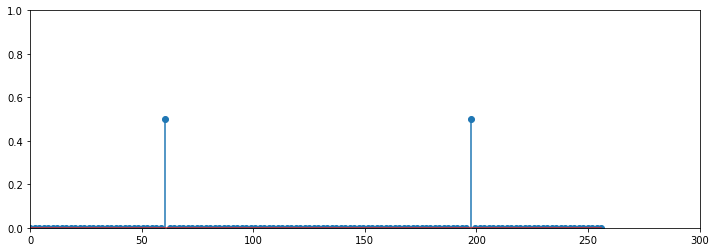

In [5]:
#f) 
plt.figure(figsize=(12,4))
Y1 = DFT(x[:128])
N = len(x[:128])
f = np.linspace(0, fs, N) 
plt.axis([0,300,0,1])
plt.stem(f,np.abs(Y1)/N)
plt.show()


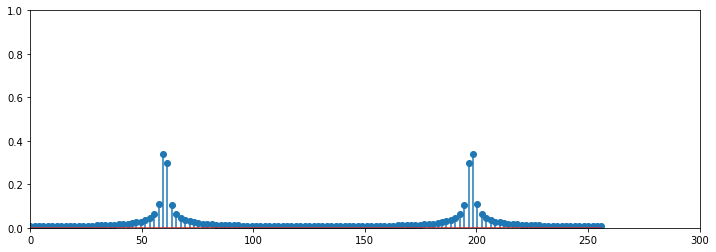

In [6]:
#g)
plt.figure(figsize=(12,4))
Y2 = DFT(x[:130])
N = len(x[:130])
f = np.linspace(0, fs, N) 
plt.axis([0,300,0,1])
plt.stem(f,np.abs(Y2)/N)
plt.show()
#do to having more sample points therefore givning more resolution therefore displaying a different plot

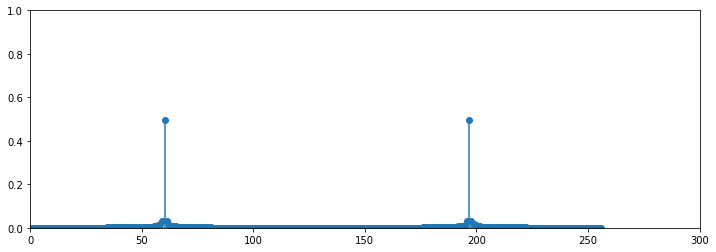

In [7]:
#h}
plt.figure(figsize=(12,4))
Y3 = DFT(x[:260])
N = len(x[:260])
f = np.linspace(0, fs, N) 
plt.axis([0,300,0,1])
plt.stem(f,np.abs(Y3)/N)
plt.show()
#the larger sample pool increased resolution, smoothing out feature form the previous sample amount

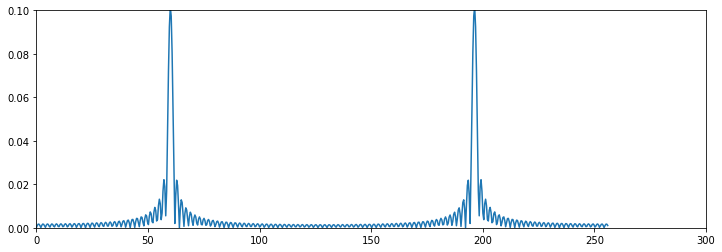

In [8]:
#i) add 500 zeros to 128x
zt=[0.0]*628
i=0
while i < 128:
    zt[i] = x[i]
    i+=1

plt.figure(figsize=(12,4))
Z = DFT(zt)
N = len(zt)
f = np.linspace(0, fs, N) 
plt.axis([0,300,0,0.1])
plt.plot(f,np.abs(Z)/N)
plt.show()
#wave like patterns on the waves with the added zeros

In [46]:
#j) windows
def Hanning(N):
    n = 0
    m = [0]*N
    while n <N:
        m[n] = 0.5 - 0.5*np.cos(2*np.pi*n/(N-1))
        n+=1
    return m
    
def Hamming(N):
    m = [0]*N
    n = 0
    while n <N:
        m[n] = 0.54 - 0.46*np.cos(2*np.pi*n/(N-1))
        n+=1
    return m

def Blackmen(N):
    m = [0]*N
    n = 0
    while n <N:
        m[n] = 0.42 - 0.5*np.cos(2*np.pi*n/(N-1)) + 0.08*np.cos(4*np.pi*n/(N-1))
        n+=1
    return m

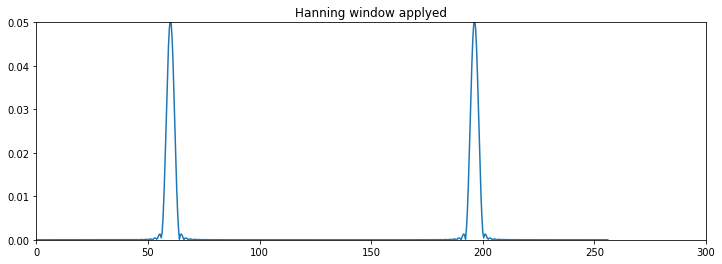

In [47]:
base = x[:128]
hanwin = Hanning(128)
Hresults = [0]*(len(base)+500)
#padding zeros for more reolution
i=0
while i < len(base) +500:
    if i <128:
        Hresults[i]= base[i]*hanwin[i]
    else:
        Hresults[i]=0
    i+=1
#testing the first window

plt.figure(figsize=(12,4))
Z = DFT(Hresults)
N = len(Hresults)
f = np.linspace(0, fs, N) 
plt.axis([0,300,0,0.05])
plt.plot(f,np.abs(Z)/N)
plt.title("Hanning window applyed")
plt.show()
#seems about right, though the rings not as obivous

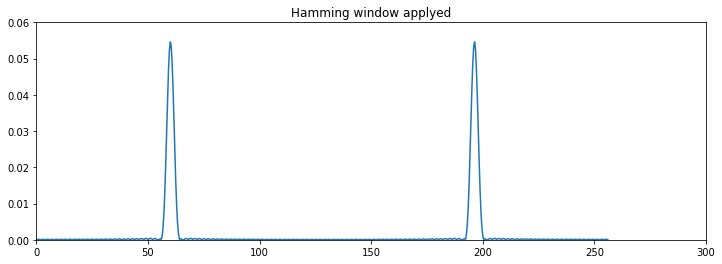

In [48]:
hamwin = Hamming(128)
Hmresults = [0]*(len(base)+500)
#padding zeros for more reolution
i=0
while i < len(base):
    if i <128:
        Hmresults[i]= base[i]*hamwin[i]
    else:
        Hmresults[i]=0
    i+=1

plt.figure(figsize=(12,4))
Z = DFT(Hmresults)
N = len(Hmresults)
f = np.linspace(0, fs, N) 
plt.axis([0,300,0,0.06])
plt.plot(f,np.abs(Z)/N)
plt.title("Hamming window applyed")
plt.show()
#lower ringing and a sharper taller tip

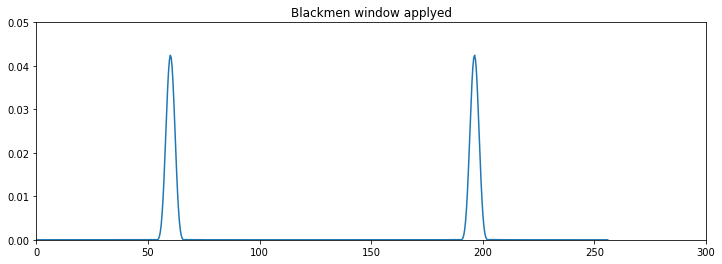

In [56]:
black = Blackmen(128)
bresults = [0]*(len(base)+500)
#padding zeros for more reolution
i=0
while i < len(base):
    if i <128:
        bresults[i]= base[i]*black[i]
    else:
        bresults[i]=0
    i+=1

plt.figure(figsize=(12,4))
Z = DFT(bresults)
N = len(bresults)
f = np.linspace(0, fs, N) 
plt.axis([0,300,0,0.05])
plt.plot(f,np.abs(Z)/N)
plt.title("Blackmen window applyed")
plt.show()
#this gives us greatly reduced ringing it has the shortest spike of the bunch

In [85]:
#generating a noisy square 
A = 4/np.pi
f=20.0
T=1/f
fs=800
Ts=1/fs
cycles=300
t=np.arange(0,cycles*T,Ts)
#square wave generater
sq = [0.0]*len(t)
n = 0
while n < len(t):
    #k start at 1
    k = 1
    summ = 0
    while k < 7:
        summ += np.sin(2*np.pi*(2*k-1)*f*t[n])/(2*k -1)
        k+=1
    sq[n]=summ*A 
    n+=1
#add noises
sqn = [0.0]*len(t)
i=0
while i < len(t):
    sqn[i] = sq[i]+np.random.normal(0,0.3)
    i+=1

12000


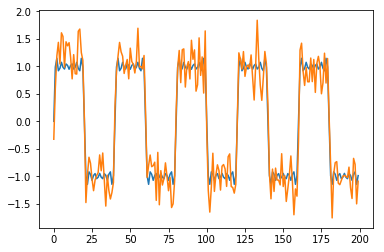

In [87]:
print(len(t))
plt.plot(sq[:200])
plt.plot(sqn[:200])
plt.show()
#seems right, didn't produce perfect square waves with this methode though

In [95]:
#2.b)split wave into 10 segments and get there DFT
#t/10 is 1200
seg1 = sqn[:1200]
y1 = DFT(seg1)
seg2 = sqn[1200:2400]
y2 = DFT(seg2)
seg3 = sqn[2400:3600]
y3 = DFT(seg3)
seg4 = sqn[3600:4800]
y4 = DFT(seg4)
seg5 = sqn[4800:6000]
y5 = DFT(seg5)
seg6 = sqn[6000:7200]
y6 = DFT(seg6)
seg7 = sqn[7200:8400]
y7 = DFT(seg7)
seg8 = sqn[8400:9600]
y8 = DFT(seg8)
seg9 = sqn[9600:10800]
y9 = DFT(seg9)
seg10 = sqn[10800:12000]
y10 = DFT(seg10)


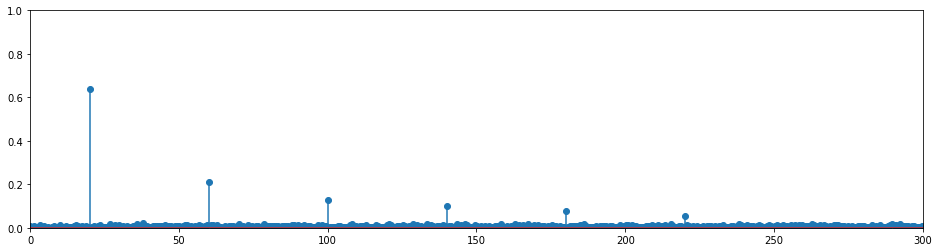

In [99]:
#plot one of them
fs = 800
plt.figure(figsize=(16,4))
Y = y5
N = len(y5)
f = np.linspace(0, fs, N) 
plt.axis([0,300,0,1])
plt.stem(f,np.abs(Y)/N)
plt.show()
#Looks right the high peak is at 20

In [100]:
#c)stack the results
n = 0
yt = [0.0]*len(seg1)
while n <len(seg1):
    yt[n] = (y1[n]+y2[n]+y3[n]+y4[n]+y5[n]+y6[n]+y7[n]+y8[n]+y9[n]+y10[n])/10
    n+=1

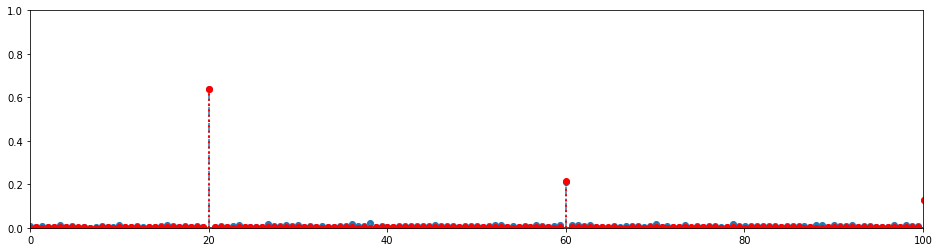

In [113]:
#plot stack with one segment
plt.figure(figsize=(16,4))
Y = y5
N = len(y5)
f = np.linspace(0, fs, N) 
plt.axis([0,100,0,1])
plt.stem(f,np.abs(Y)/N,"-.")

Y1 = yt
N = len(yt)
total = plt.stem(f,np.abs(Y1)/N,":")
plt.setp(total, color='r', linewidth=2)
plt.show()
#almost exacaly overlaped

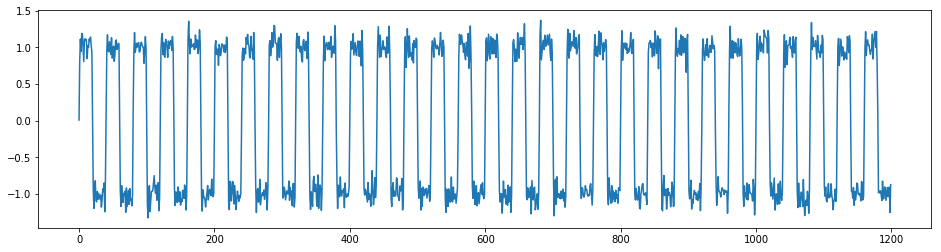

In [115]:
#d) IDFT the stacked tranform
xt = IDFT(yt)
plt.figure(figsize=(16,4))
plt.plot(xt)
plt.show()
#looks almost like a square

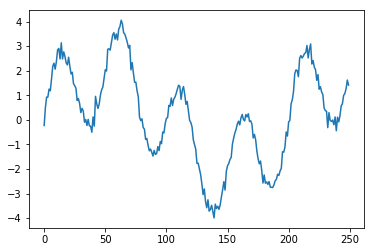

In [304]:
#3. convlution 
A=2
f=50.0
T=1/f
fs=50*f
Ts=1/fs
cycles=5
t=np.arange(0,cycles*T,Ts)
i=0
x=[0.]*len(t)
while i < len(t):
    x[i]=A*np.sin(2*np.pi*f*t[i])+A*np.sin(.5*np.pi*f*t[i])+np.random.normal(0,.2)
    i+=1
plt.plot(x)
plt.show()

In [305]:
#function from other labs here
def myconvu(base,sys):
    limitb = len(base)
    limits = len(sys)
    out=[0]*len(base)
    ave = 0
    
    i= 0

    while i < limitb:
        j = 0
        while j < limits:
            if ((i-j)<len(base)) and ((i-j)>0):
                out[i]+= sys[j]*base[i-j]
            j+=1
        i+=1
    return out

#sinc filters needs to be odd for best effect
def low_sinc(length):
    #using np.sinc funtion to generate sinc linit -pi to pi
    #should be odd and large to give good resolution
    x = np.linspace(-4,4, num =length)
    sinc = np.sinc(x)
    norm = np.sum(sinc)
    i = 0
    out = [0]*length
    
    while i < length:
        out[i]=sinc[i]/norm
        i+=1
    
    return out
    


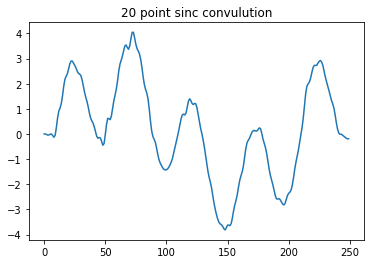

In [306]:
#convulve the wave with a 20 point sinc function and plot it
sincx=myconvu(x,low_sinc(20))
plt.plot(sincx)
plt.title("20 point sinc convulution")
plt.show()

In [307]:
#b)apply DTF to both input and output
Din = DFT(x)
#adding zeros to the smoother function
smo=low_sinc(20)
i = 0
sm = [0.0]*len(x)
while i < len(smo):
    sm[i] =smo[i]
    i+=1
smoother = DFT(sm)
#multipy the DFT together
Dprod=[0.0]*len(Din)
n = 0
while n < len(Din):
    Dprod[n] = (Din[n] * smoother[n])#fix the size issue if exist
    n+=1
#the IDFT of the  product
IDprod = IDFT(Dprod)
#fix the phase difference
n = 0
skip = 10 #chage to see effect
IDout=[0.0]*len(x)
while n +skip < len(x):
    IDout[n] = IDprod[n+skip]
    n+=1

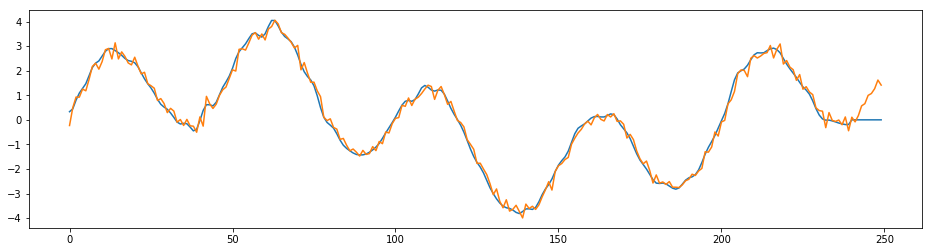

In [308]:
#c)plot IDFT to see what its like
plt.figure(figsize=(16,4))
plt.plot(IDout)
plt.plot(x)
plt.show()
#The wave is much smoother than before 
#Lose the last couple points in data

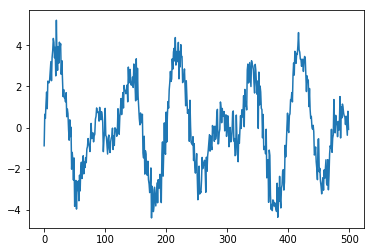

In [325]:
#d) convu new signal with the 
A=2
f=50.0
T=1/f
fs=100*f
Ts=1/fs
cycles=5
t=np.arange(0,cycles*T,Ts)
i=0
x=[0.]*len(t)
while i < len(t):
    x[i]=A*np.sin(2*np.pi*f*t[i])+A*np.sin(3*np.pi*f*t[i])+np.random.normal(0,.6)
    i+=1
plt.plot(x)
plt.show()


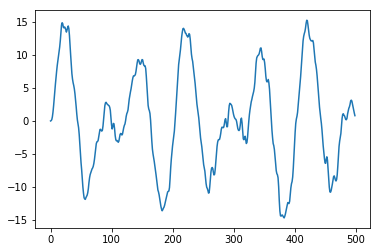

In [326]:
#apply hamming window
Hwout = myconvu(x,Hamming(8))
plt.plot(Hwout)
plt.show()
#greatly reduced the noise while keeping the shape of the wave

In [335]:
#e) 
Din = DFT(Hwout)
#adding zeros to the Ham list
Ham=Hamming(8)
i = 0
Ham1 = [0.0]*len(Hwout)
while i < len(Ham):
    Ham1[i] =Ham[i]
    i+=1

DHam = DFT(Ham1)
#divid the DFT together
Dprod=[0.0]*len(Din)
n = 0
while n < len(Din):
    Dprod[n] = (Din[n] / DHam[n])
    n+=1
#the IDFT of the  product
IDprod = IDFT(Dprod)


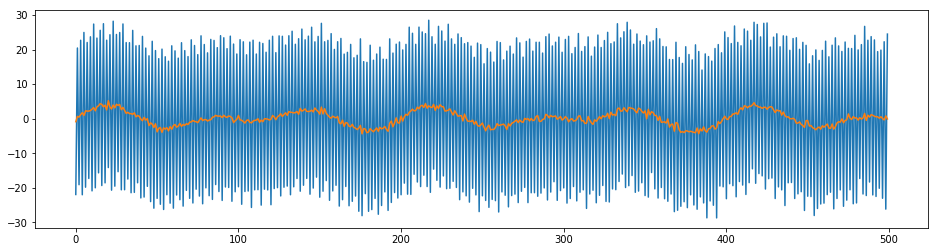

In [336]:
#f) plot the result of e)
plt.figure(figsize=(16,4))
plt.plot(IDprod)
plt.plot(x)
plt.show()
#semm to have increased the noise of the function, but the center still match the orginal

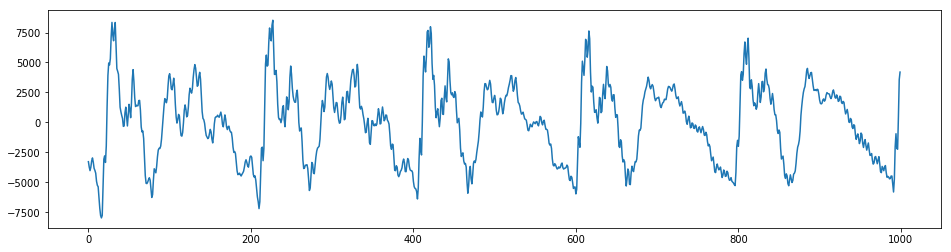

In [432]:
#4. modulating sound 
import IPython
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
fs, data = wavfile.read("fox.wav") #fs is the sampling rate
x = data[:,0] # Left Channel
y = data[:,1] # Right Channel

plt.plot(x[1000:2000])


In [433]:
#a) cut the noise
#low pass function

import numpy as np
import math
def low_pass(signal,fc,reverse = False):
    #find x frist
    x = math.exp(-2*np.pi*fc)
    out = [0.0]*len(signal)
    # a and b
    a0 = 1-x
    b1= x
    # aplly filter
    if(reverse == False):
        n = 0
        while n < len(signal):
            out[n]= a0*signal[n]
            if(n-1 >= 0):
                out[n]= out[n] + b1*out[n-1]
            n+=1
    if(reverse == True):
        n = len(signal)-1
        while n >=0:
            out[n]= a0*signal[n]
            if(n+1 <= len(signal)-1):
                out[n]= out[n] + b1*out[n+1]
            n-=1
    return out
print(fs)

44100


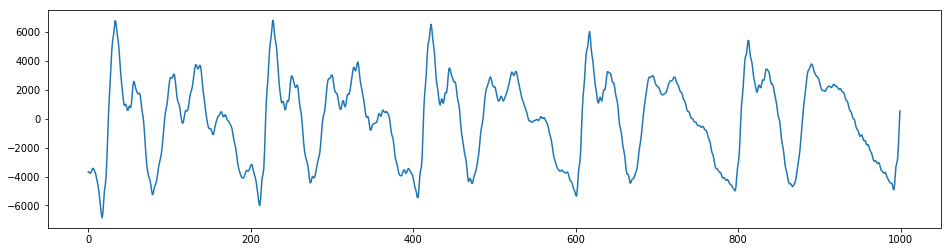

In [443]:
fc = 2000/fs
filout = low_pass(x,fc)
plt.figure(figsize=(16,4))
plt.plot(filout[1000:2000])
plt.show()

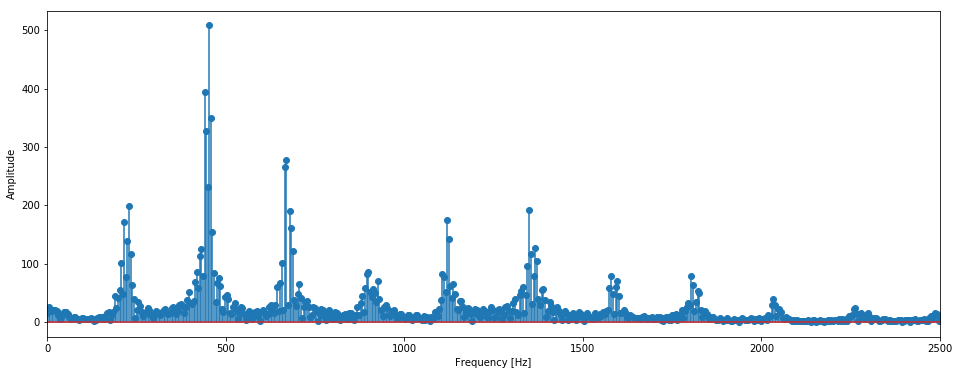

Run time: 47.359 s


In [444]:
#DFT of the filtered function
import time
time_start = time.process_time()

fft = np.fft.fft(filout[:10000]) 
N = len(filout[:10000])
f = np.linspace(0, fs, N) 
plt.figure(figsize=(16,6))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,2500)
plt.stem(f,np.abs(fft)/N)
plt.show()
time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)

In [445]:
#b) mod the wave
n = 0
modout=[0]*len(filout)
while n < len(filout):
    modout[n] = filout[n]*2*np.cos((2*np.pi*fc*n))#fc=f0/fs
    n+=1
    


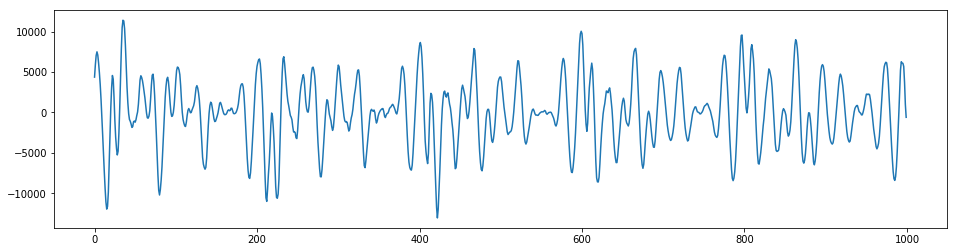

In [446]:
#plot to see the difference
plt.figure(figsize=(16,4))
plt.plot(modout[1000:2000])
plt.show()

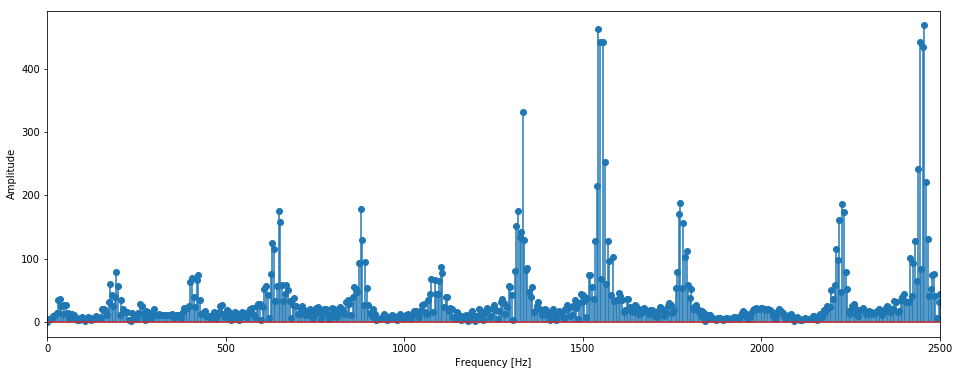

Run time: 50.391 s


In [447]:
#c)
time_start = time.process_time()

fft = np.fft.fft(modout[:10000]) #selecting range to reduce calc time
N = len(modout[:10000])
f = np.linspace(0, fs, N) 
plt.figure(figsize=(16,6))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,2500)
plt.stem(f,np.abs(fft)/N)
plt.show()
time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)
#Some of the peak have shifted right

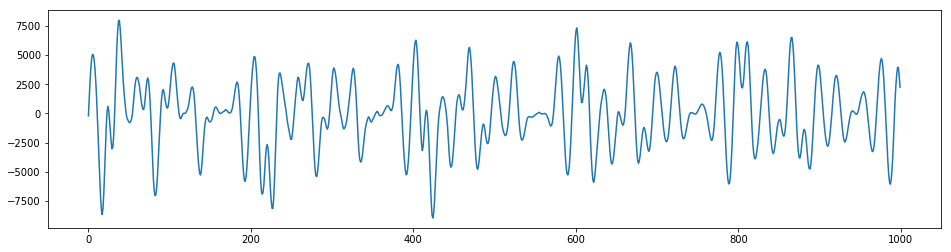

In [448]:
#d) by filtering this we should get a fliped signal
fc = 2000/fs
finout = low_pass(modout,fc)
plt.figure(figsize=(16,4))
plt.plot(finout[1000:2000])
plt.show()

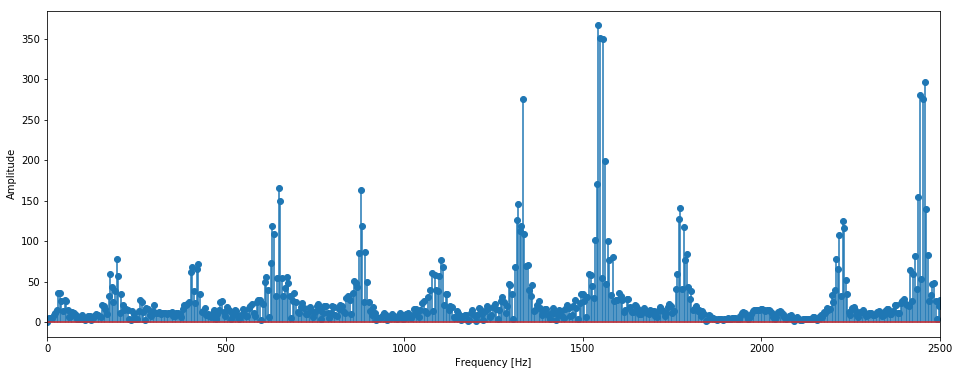

Run time: 46.625 s


In [449]:
#DFT of the new signal
time_start = time.process_time()

fft = np.fft.fft(finout[:10000]) #selecting range to reduce calc time
N = len(finout[:10000])
f = np.linspace(0, fs, N) 
plt.figure(figsize=(16,6))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,2500)
plt.stem(f,np.abs(fft)/N)
plt.show()
time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)
#right side peak have flaten

In [450]:
#trial based
IPython.display.Audio("fox.wav")

In [451]:
#save new signal into wave
sfox = np.asarray(finout,dtype=np.int16)
wavfile.write("scramblefox.wav",fs,sfox)
IPython.display.Audio("scramblefox.wav")
#sounds different but can't tell if it worked the right way

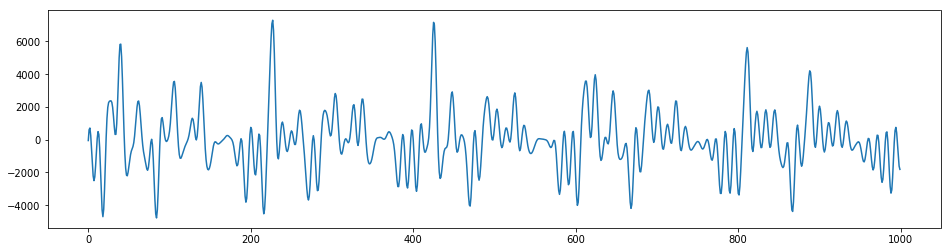

In [454]:
#f)unscramble the wave
#filter
fc = 2000/fs
unin = low_pass(finout,fc)
#mod
n = 0
unmodout=[0]*len(unin)
while n < len(unin):
    unmodout[n] = unin[n]*2*np.cos((2*np.pi*fc*n))
    n+=1
#filter
fc = 2000/fs
unout = low_pass(unmodout,fc)

plt.figure(figsize=(16,4))
plt.plot(unout[1000:2000])
plt.show()

In [455]:
unfox = np.asarray(unout,dtype=np.int16)
wavfile.write("unscramblefox.wav",fs,unfox)
IPython.display.Audio("unscramblefox.wav")
#kind of able to what I am saying but not quite right "dog" was legable